In [ ]:
!pip install datasets
!pip install tiktoken

# Just some testing

Will attempt to load and run a test function.

In [ ]:
import requests
import os
import sys
sys.path.append(os.getcwd())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import Dataset
from pathlib import Path

# # print("Downloading embeddings_sm.py")
# request = requests.get("https://raw.githubusercontent.com/shanaam/nlp_project_oviraptor_twist_g2/sm_working_branch/embeddings/embeddings_sm.py")
# with open("embeddings_sm.py", "wb") as f:
#     f.write(request.content)

# request = requests.get("https://raw.githubusercontent.com/shanaam/nlp_project_oviraptor_twist_g2/sm_working_branch/model/model_sm.py")
# with open("model_sm.py", "wb") as f:
#     f.write(request.content)

# files = [f for f in os.listdir('.') if os.path.isfile(f)]
# files

In [ ]:
# os.chdir('/content')
# from embeddings_sm import TokenizedC4Dataset # NOTE: if embeddings_sm cannot be resolved, most likely need to cd into the correct directory
# from model_sm import MLP

# Load data

In [ ]:
from datasets import load_dataset # hugging face datasets

dataset = load_dataset("Numind/C4_sentiment-analysis") # Note: this is already a dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 254106
    })
    balanced: Dataset({
        features: ['text', 'label'],
        num_rows: 40581
    })
})

In [ ]:
import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from torch.utils.data import Dataset

# Download helper functions from Learn PyTorch repo (if not already downloaded)

print("Downloading embeddings_sm.py")
request = requests.get("https://raw.githubusercontent.com/shanaam/nlp_project_oviraptor_twist_g2/sm_working_branch/embeddings/embeddings_sm.py")
with open("embeddings_sm.py", "wb") as f:
    f.write(request.content)

files = [f for f in os.listdir('.') if os.path.isfile(f)]
files

['state_dict.pt', 'embeddings_sm.py']

In [ ]:
train_data = dataset['balanced']

print(f"Train_dataset has {len(train_data)} rows")
print("\nExample:")
print(train_data[5])

print(f"\n\nWe would need to do our own train/test split. If we hold out 20% of data, we have {int(len(train_data) * 0.8)} rows to train on.")

Train_dataset has 40581 rows

Example:
{'text': 'The market awoke from its slumber to a classic dump fest  The price fell over $10 from $255 to a low of $243 on Bitfinex It looks as if the rout will continue over night as the market pauses before resuming the downward spiral', 'label': 1}


We would need to do our own train/test split. If we hold out 20% of data, we have 32464 rows to train on.


In [ ]:
print(f"Number of unique labels: {len(set(train_data['label']))}")

Number of unique labels: 3


In [ ]:
train_data_df = pd.DataFrame(train_data)

In [ ]:
train_data_df.head(25)
df = train_data_df[:40000]
df.head(10)

,text,label
0,The door of Peter Shire’s first ceramics studi...,1
1,Another 400 charities are in danger of losing ...,1
2,Action learning teambuilding programs for orga...,2
3,From your physical assets down to business dat...,2
4,PHILADELPHIA (CNN) -- Democrats kick off their...,1
5,The market awoke from its slumber to a classic...,1
6,Long Tall Deb and Colin John continue their ge...,0
7,For months many market watchers have describe...,2
8,It seems that the database on this ancient unm...,1
9,Funding banking helps to spice up the economy ...,0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
X,y = df['text'].values,df['label'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (30000,)
shape of test data is (10000,)


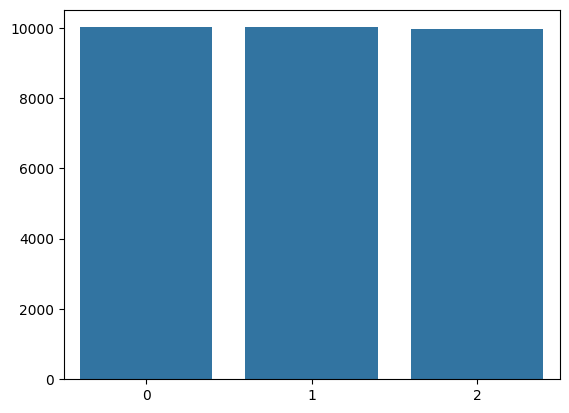

In [ ]:
dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['0','1', '2']),y=dd.values)
plt.show()

In [ ]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

def tockenize(x_train,y_train,x_val,y_val):
    word_list = []

    stop_words = set(stopwords.words('english'))
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)

    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

    # tockenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                    if preprocess_string(word) in onehot_dict.keys()])

    # encoded_train = [1 if label =='positive' else 0 for label in y_train]
    # encoded_test = [1 if label =='positive' else 0 for label in y_val]
    return final_list_train, y_train, final_list_test, y_val,onehot_dict


In [ ]:
x_train,y_train,x_test,y_test ,vocab = tockenize(x_train,y_train,x_test,y_test)

In [ ]:
print(f"length of first element of x_train: {len(x_train[0])}")
print(f"\nlength of second element of x_train: {len(x_train[1])}")
# note: vocab is a one-hot dictionary
print(f'\nLength of vocabulary is {len(vocab)}')

length of first element of x_train: 16

length of second element of x_train: 4

Length of vocabulary is 1000


In [ ]:
{k: vocab[k] for k in list(vocab)[:5]} # 5 values from vocab dict.

{'one': 1, 'new': 2, 'time': 3, 'like': 4, 'people': 5}

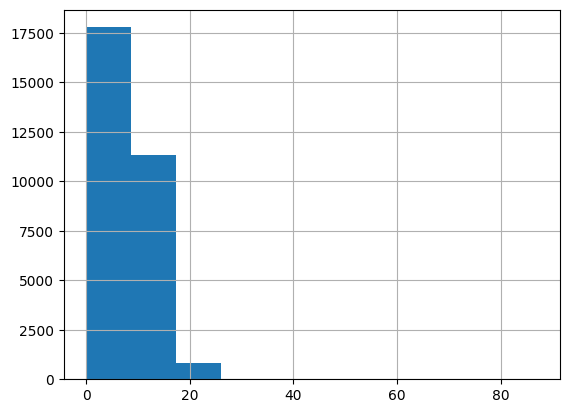

count    30000.000000
mean         7.776267
std          4.721005
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         87.000000
dtype: float64

In [ ]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [ ]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

#we have very less number of reviews with length > 50.
#So we will consideronly those below it.
x_train_pad = padding_(x_train, 50)
x_test_pad = padding_(x_test, 50)

print(f"length of first element of x_train: {len(x_train_pad[0])}")
print(f"\nlength of second element of x_train: {len(x_train_pad[1])}")
print(x_train_pad[0])
print(y_train)

length of first element of x_train: 50

length of second element of x_train: 50
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 180 828
 918 828 417 727  96 195 203 127 860  28 861 542 836 860]
[1 1 0 ... 2 2 2]


In [ ]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 100

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [ ]:
train_loader

In [ ]:
# obtain one batch of training data
# dataiter = iter(train_loader)
# sample_x, sample_y = dataiter.next()

# print('Sample input size: ', sample_x.size()) # batch_size, seq_length
# print('Sample input: \n', sample_x)
# print('Sample input: \n', sample_y)

In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self,n_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.n_layers = n_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        #lstm
        self.lstm = nn.LSTM(input_size = embedding_dim,
                            hidden_size = self.hidden_dim,
                            num_layers = n_layers,
                            batch_first = True
                            )

        # dropout layer
        self.dropout = nn.Dropout(drop_prob)

        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 3)

    def forward(self,x,hidden):
        batch_size = x.size(0)

        print(f"batch size: {batch_size}")
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        print(f"embed shape: {embeds.shape}")  #[100, 50, 64]
        lstm_out, hidden = self.lstm(embeds, hidden)

        # lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) # was used for 1d output

        print(f"\nlstm out shape: {lstm_out.shape}")
        print(f"lstm out: {lstm_out}")

        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        # out = self.fc(out)
        out = self.relu(self.fc(out))

        # sigmoid function
        out = self.fc2(out)

        # print(f"\nfc2 out shape: {out.shape}")
        # print(f"fc2 out: {out}")

        out = F.log_softmax(out, dim=1)

        # print(f"\nsoftmax out shape: {out.shape}")
        # print(f"softmax out: {out}")

        # reshape to be batch_size first
        # out = out.view(batch_size, -1)
        # out = out[:, -1] # get last batch of labels

        out = out[:, -1, :]

        # print(f"\nOUT shape: {out.shape}")
        # print(f"OUT: {out}")

        # return last sigmoid output and hidden state
        return out, hidden

    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.n_layers, batch_size, self.hidden_dim)).to(device)
        c0 = torch.zeros((self.n_layers, batch_size, self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden


In [ ]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [ ]:
n_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 3
hidden_dim = 300


model = SentimentRNN(n_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 300, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=300, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=3, bias=True)
)


In [ ]:
# loss and optimization functions
lr=0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
# FIX pred squeeze and mean might not work for non binary case
def acc(pred,label):
    pred = torch.argmax(pred, dim = 1)
    return torch.sum(pred == label)

In [ ]:
clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]
all_train_losses = []

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()

    # initialize hidden state
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:

        # print(f"inputs: {inputs}")
        # print(f"\nlabels: {labels}")

        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # print(f"h shape: {h[0].shape}")

        model.zero_grad()
        output,h = model(inputs,h)

        # calculate the loss and perform backprop
        loss = criterion(output, labels)
        loss.backward()
        train_losses.append(loss.item())
        all_train_losses.append(loss.item())

        # calculating accuracy
        accuracy = acc(output, labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output, labels)

            val_losses.append(val_loss.item())

            accuracy = acc(output, labels)
            val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), 'state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Streaming output truncated to the last 5000 lines.
         [ 0.0630, -0.2531, -0.0664,  ..., -0.2313,  0.0166, -0.0505],
         [ 0.1007, -0.2343, -0.0372,  ..., -0.2572, -0.0846, -0.0743],
         [ 0.0882, -0.1029, -0.0154,  ..., -0.2979, -0.1427, -0.1164]],

        [[ 0.0142,  0.0141, -0.0257,  ..., -0.0367, -0.2712, -0.0298],
         [ 0.0238,  0.0290, -0.0282,  ..., -0.0956, -0.2324, -0.0312],
         [ 0.0240,  0.0540, -0.0320,  ..., -0.1120, -0.1717, -0.0291],
         ...,
         [ 0.0349,  0.1339, -0.0934,  ...,  0.0537, -0.0931, -0.0567],
         [ 0.0039,  0.1312, -0.0282,  ...,  0.1221, -0.2003, -0.1232],
         [ 0.0147,  0.0675, -0.0071,  ...,  0.1702, -0.3701, -0.1345]],

        [[ 0.0080,  0.1142, -0.0686,  ..., -0.0200, -0.0689, -0.0721],
         [ 0.0339,  0.1143, -0.0721,  ..., -0.0451, -0.0730, -0.0690],
         [ 0.0281,  0.1269, -0.0784,  ..., -0.0583, -0.0633, -0.0700],
         ...,
         [ 0.1320, -0.2949,  0.0700,  ..., -0.1700,  0.0554,  0.0

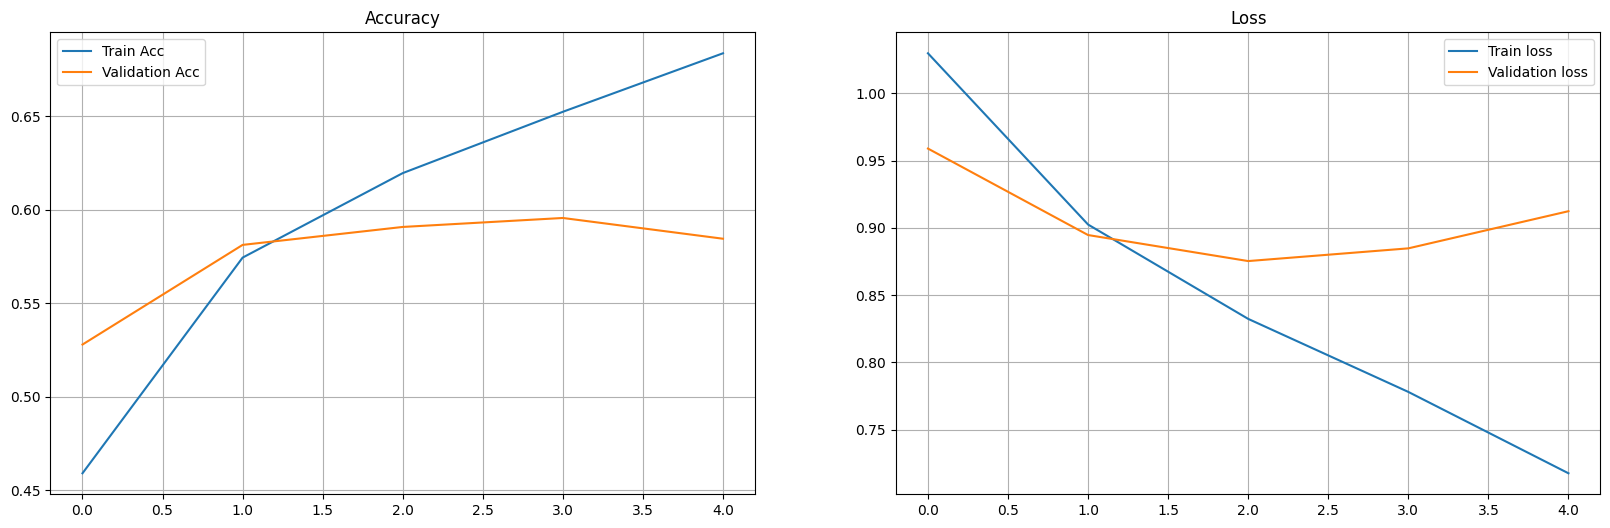

In [ ]:
epoch_tr_acc=[t.cpu().numpy() for t in epoch_tr_acc]
epoch_vl_acc= [t.cpu().numpy() for t in epoch_vl_acc]

fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

In [ ]:
def predict_text(text):
        word_seq = np.array([vocab[preprocess_string(word)] for word in text.split()
                         if preprocess_string(word) in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding_(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = model.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = model(inputs, h)
        return(output)

In [ ]:
index = 7
print(df['text'][index])
print('='*70)
print(f'Actual sentiment is  : {df["label"][index]}')
print('='*70)
pro = predict_text(df['text'][index])
status = torch.argmax(pro, dim = 1)
print(f'Predicted sentiment is {status.cpu().item()} with a probability of {F.softmax(pro, dim = 1)[0].detach().cpu().numpy()}')

For months  many market watchers have described Intel as complacent as we've seen the surge in new products from companies such as ARM  NVIDIA and Xilinx This week  Intel is hitting back
Actual sentiment is  : 2
batch size: 1
embed shape: torch.Size([1, 500, 64])

lstm out shape: torch.Size([1, 500, 300])
lstm out: tensor([[[ 0.0192,  0.0488, -0.0304,  ..., -0.0459, -0.0460, -0.0082],
         [ 0.0104,  0.0831, -0.0568,  ..., -0.0641, -0.0515, -0.0272],
         [ 0.0053,  0.1046, -0.0719,  ..., -0.0663, -0.0575, -0.0398],
         ...,
         [-0.0211,  0.0785, -0.0898,  ...,  0.0789, -0.1941, -0.1018],
         [ 0.0161,  0.0909, -0.0163,  ...,  0.1266, -0.2162, -0.1267],
         [ 0.0137,  0.0908, -0.0182,  ...,  0.0535, -0.2585, -0.0619]]],
       device='cuda:0', grad_fn=<CudnnRnnBackward0>)
Predicted sentiment is 1 with a probability of [0.1346409  0.7090708  0.15628833]


0 = Positive, 1 = Negative, 2 = Neutral (annotated by GPT 3.5)

Very low number of negative sentiment tweets. We would likely need to use the balanced dataset for our categorization.